In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize']=8,6

import matplotlib as mpl
mpl.style.use('ggplot') #Good choice!!!!!!!!!

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.preprocessing import Imputer, Normalizer, StandardScaler
from sklearn.model_selection import train_test_split, StratifiedKFold

In [4]:
train=pd.read_csv('data/titanic/train.csv')
test=pd.read_csv('data/titanic/test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
full=train.append(test,ignore_index=True)

In [7]:
full=pd.concat([train, test], ignore_index=True)

In [8]:
full.head(2)

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599


In [9]:
full.columns

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket'],
      dtype='object')

Age
Fare


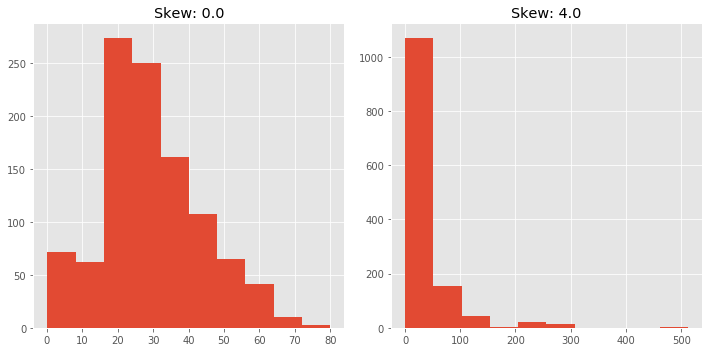

In [11]:
fig = plt.figure(figsize=(10,5))
var=['Age', 'Fare']
for i, var_name in enumerate(var):
    print(var_name)
    ax=fig.add_subplot(1,2,i+1)
    full[var_name].hist(bins=10, ax=ax)
    ax.set_title("Skew: "+str(round(full[var_name].skew())))
fig.tight_layout()

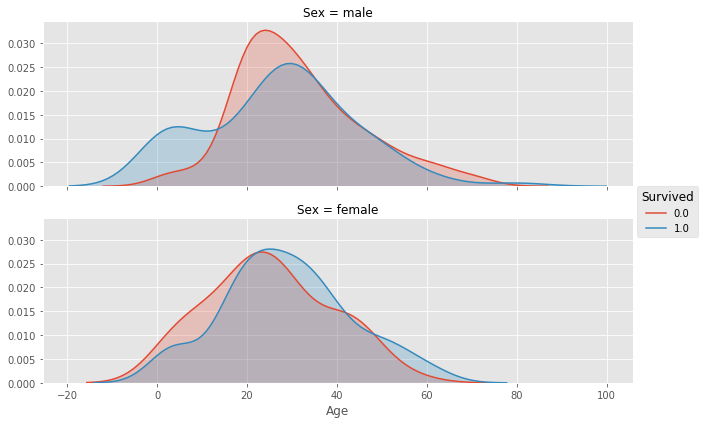

In [20]:
facet=sns.FacetGrid(full, hue='Survived', aspect=3, row='Sex')
facet.map(sns.kdeplot, 'Age', shade=True)
facet.add_legend()

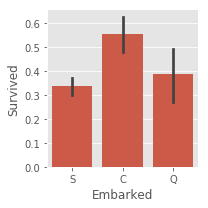

In [21]:
facet=sns.FacetGrid(full)
facet.map(sns.barplot, 'Embarked', 'Survived')

In [25]:
corre=full.corr()

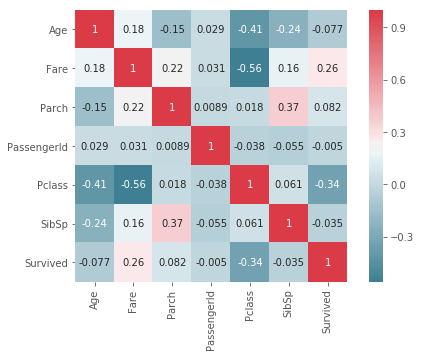

In [27]:
fig, ax=plt.subplots(figsize=(8,5))
cmap=sns.diverging_palette(220,10, as_cmap=True)
sns.heatmap(corre, square=True, annot=True, cmap=cmap,ax=ax, annot_kws={'fontsize':10})

In [41]:
del train, test
titanic=full[:891]
print('Datasets: full-',full.shape,' titanic-',titanic.shape)

Datasets: full- (1309, 12)  titanic- (891, 12)


In [42]:
titanic.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [43]:
titanic.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,29.699118,32.204208,0.381594,446.000000,2.308642,0.523008,0.383838
std,14.526497,49.693429,0.806057,257.353842,0.836071,1.102743,0.486592
min,0.420000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20.125000,7.910400,0.000000,223.500000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,446.000000,3.000000,0.000000,0.000000
75%,38.000000,31.000000,0.000000,668.500000,3.000000,1.000000,1.000000
max,80.000000,512.329200,6.000000,891.000000,3.000000,8.000000,1.000000


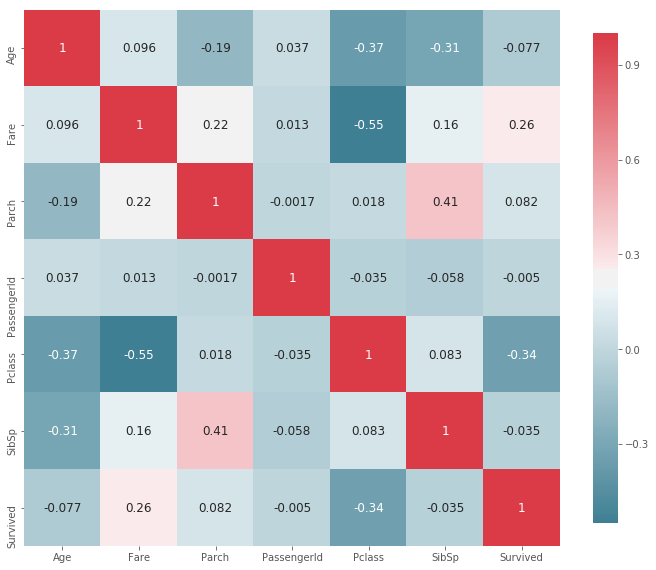

In [45]:
def plot_correlation_map(df ):
    corr = df.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(titanic)

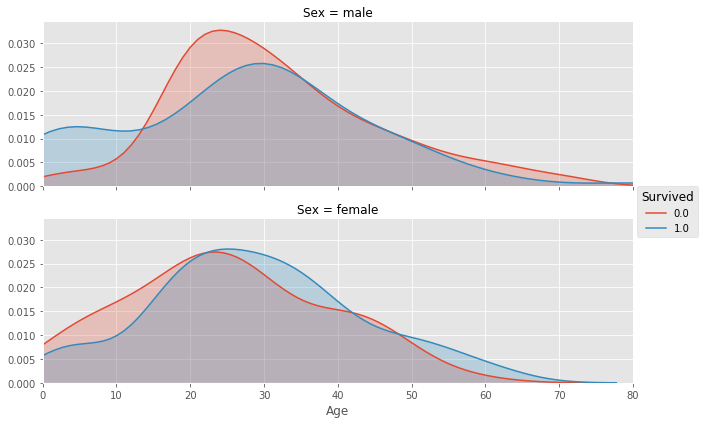

In [46]:
def plot_distribution(df, var, target, **kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, row=row, col=col, hue=target, aspect=3)
    facet.map(sns.kdeplot, var, shade=True)
    facet.set(xlim=(0, df[var].max()))
    facet.add_legend()
plot_distribution(titanic, 'Age', 'Survived', row='Sex')

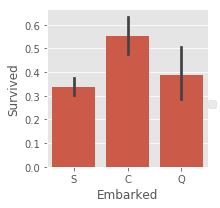

In [47]:
def plot_categories(df, var, target, **kwargs):
    row=kwargs.get('row',None)
    col=kwargs.get('col',None)
    facet=sns.FacetGrid(df, aspect=1,row=row, col=col)
    facet.map(sns.barplot, var, target)
    facet.add_legend()
plot_categories(titanic, 'Embarked','Survived')

In [51]:
a=titanic.Sex=='male'
a.value_counts()

True     577
False    314
Name: Sex, dtype: int64

In [52]:
np.where(titanic.Sex=='male',1,0)

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0,

In [59]:
sex=pd.Series(np.where(full.Sex=='male',1,0), name='Sex')
sex.value_counts()

1    843
0    466
Name: Sex, dtype: int64

In [62]:
pd.get_dummies(titanic.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [63]:
embarked=pd.get_dummies(full.Embarked, prefix='embark')
pclass=pd.get_dummies(full.Pclass, prefix='class')

In [68]:
np.isnan(full.Age)

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299     True
1300    False
1301     True
1302    False
1303    False
1304     True
1305    False
1306    False
1307     True
1308     True
Name: Age, Length: 1309, dtype: bool

In [72]:
full.Age.isnull()

0       False
1       False
2       False
3       False
4       False
5        True
6       False
7       False
8       False
9       False
10      False
11      False
12      False
13      False
14      False
15      False
16      False
17       True
18      False
19       True
20      False
21      False
22      False
23      False
24      False
25      False
26       True
27      False
28       True
29       True
        ...  
1279    False
1280    False
1281    False
1282    False
1283    False
1284    False
1285    False
1286    False
1287    False
1288    False
1289    False
1290    False
1291    False
1292    False
1293    False
1294    False
1295    False
1296    False
1297    False
1298    False
1299     True
1300    False
1301     True
1302    False
1303    False
1304     True
1305    False
1306    False
1307     True
1308     True
Name: Age, Length: 1309, dtype: bool

In [71]:
full.isnull().sum()

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

In [73]:
full.Age.fillna(full.Age.mean())

0       22.000000
1       38.000000
2       26.000000
3       35.000000
4       35.000000
5       29.881138
6       54.000000
7        2.000000
8       27.000000
9       14.000000
10       4.000000
11      58.000000
12      20.000000
13      39.000000
14      14.000000
15      55.000000
16       2.000000
17      29.881138
18      31.000000
19      29.881138
20      35.000000
21      34.000000
22      15.000000
23      28.000000
24       8.000000
25      38.000000
26      29.881138
27      19.000000
28      29.881138
29      29.881138
          ...    
1279    21.000000
1280     6.000000
1281    23.000000
1282    51.000000
1283    13.000000
1284    47.000000
1285    29.000000
1286    18.000000
1287    24.000000
1288    48.000000
1289    22.000000
1290    31.000000
1291    30.000000
1292    38.000000
1293    22.000000
1294    17.000000
1295    43.000000
1296    20.000000
1297    23.000000
1298    50.000000
1299    29.881138
1300     3.000000
1301    29.881138
1302    37.000000
1303    28

In [74]:
imputed=pd.DataFrame()
imputed['Age']=full.Age.fillna(full.Age.mean())
imputed['Fare']=full.Fare.fillna(full.Fare.mean())
imputed.shape

(1309, 2)

In [75]:
full['Name'].head()

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
2                               Heikkinen, Miss. Laina
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                             Allen, Mr. William Henry
Name: Name, dtype: object

In [78]:
full.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())

0           Mr
1          Mrs
2         Miss
3          Mrs
4           Mr
5           Mr
6           Mr
7       Master
8          Mrs
9          Mrs
10        Miss
11        Miss
12          Mr
13          Mr
14        Miss
15         Mrs
16      Master
17          Mr
18         Mrs
19         Mrs
20          Mr
21          Mr
22        Miss
23          Mr
24        Miss
25         Mrs
26          Mr
27          Mr
28        Miss
29          Mr
         ...  
1279        Mr
1280    Master
1281        Mr
1282       Mrs
1283    Master
1284        Mr
1285        Mr
1286       Mrs
1287        Mr
1288       Mrs
1289        Mr
1290        Mr
1291      Miss
1292        Mr
1293      Miss
1294        Mr
1295        Mr
1296        Mr
1297        Mr
1298        Mr
1299      Miss
1300      Miss
1301      Miss
1302       Mrs
1303      Miss
1304        Mr
1305      Dona
1306        Mr
1307        Mr
1308    Master
Name: Name, Length: 1309, dtype: object

In [87]:
title=pd.DataFrame()
title['Title']=full.Name.apply(lambda name: name.split(',')[1].split('.')[0].strip())
title['Title'].head(10)


0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
5        Mr
6        Mr
7    Master
8       Mrs
9       Mrs
Name: Title, dtype: object

In [88]:
title.Title.value_counts()

Mr              757
Miss            260
Mrs             197
Master           61
Dr                8
Rev               8
Col               4
Ms                2
Major             2
Mlle              2
Jonkheer          1
Dona              1
Capt              1
Mme               1
the Countess      1
Sir               1
Lady              1
Don               1
Name: Title, dtype: int64

In [89]:
Title_Dictionary = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
print(Title_Dictionary.keys())
print(Title_Dictionary.values())

dict_keys(['Capt', 'Col', 'Major', 'Jonkheer', 'Don', 'Sir', 'Dr', 'Rev', 'the Countess', 'Dona', 'Mme', 'Mlle', 'Ms', 'Mr', 'Mrs', 'Miss', 'Master', 'Lady'])
dict_values(['Officer', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Royalty', 'Officer', 'Officer', 'Royalty', 'Royalty', 'Mrs', 'Miss', 'Mrs', 'Mr', 'Mrs', 'Miss', 'Master', 'Royalty'])


In [85]:
Title_Dictionary['Ms']

'Mrs'

In [91]:
tt=title.Title.apply(lambda name: Title_Dictionary[name])
tt.head(5)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [92]:
title.Title=title.Title.map(Title_Dictionary)
title.Title.head(5)

0      Mr
1     Mrs
2    Miss
3     Mrs
4      Mr
Name: Title, dtype: object

In [93]:
title=pd.get_dummies(title.Title)
title.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [95]:
full.Cabin.fillna('U').value_counts()

U                  1014
C23 C25 C27           6
B57 B59 B63 B66       5
G6                    5
C78                   4
F33                   4
F4                    4
F2                    4
D                     4
B96 B98               4
C22 C26               4
E34                   3
B58 B60               3
A34                   3
E101                  3
B51 B53 B55           3
C101                  3
C86                   2
E50                   2
D17                   2
B71                   2
E25                   2
E121                  2
B49                   2
D36                   2
C126                  2
C6                    2
E44                   2
C89                   2
B18                   2
                   ... 
B10                   1
C104                  1
F E57                 1
B38                   1
D6                    1
F E69                 1
A36                   1
A9                    1
C132                  1
C103                  1
E58             

In [96]:
cabin=full.Cabin.fillna('U')


In [97]:
cabin=cabin.apply(lambda c: c[0])
cabin.value_counts()

U    1014
C      94
B      65
D      46
E      41
A      22
F      21
G       5
T       1
Name: Cabin, dtype: int64

In [98]:
cabin=pd.get_dummies(cabin,prefix='Cabin')
cabin.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [136]:
full.Ticket[:5]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
Name: Ticket, dtype: object

In [99]:
full.Ticket[0]

'A/5 21171'

In [100]:
ti=full.Ticket[0]
ti=ti.replace('/','')
ti=ti.split()
ti

['A5', '21171']

In [102]:
type(ti)

list

In [147]:
ti=list(map(lambda t: t.strip(), ti))
ti

['A5', '21171']

In [109]:
ti=filter(lambda i: not i.isdigit(), ti)
list(ti)

['A5']

In [110]:
def clean_tickets(ticket):
    ticket=ticket.replace('/','')
    ticket=ticket.replace('.','')
    ticket=ticket.split()
    ticket=list(map(lambda t: t.strip(), ticket))
    ticket=list(filter(lambda t: not t.isdigit(), ticket))
    if(len(ticket)>0):
        return ticket[0]
    else:
        return 'XXX'
    
tickets=full.Ticket.apply(clean_tickets)
tickets.head()

0        A5
1        PC
2    STONO2
3       XXX
4       XXX
Name: Ticket, dtype: object

In [111]:
tickets=pd.get_dummies(tickets, prefix='ticket')
print(tickets.shape)
tickets.head()

(1309, 37)


,ticket_A,ticket_A4,ticket_A5,ticket_AQ3,ticket_AQ4,ticket_AS,ticket_C,ticket_CA,ticket_CASOTON,ticket_FC,...,ticket_SOTONO2,ticket_SOTONOQ,ticket_SP,ticket_STONO,ticket_STONO2,ticket_STONOQ,ticket_SWPP,ticket_WC,ticket_WEP,ticket_XXX
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [112]:
family=pd.DataFrame()
family['Family']=full.Parch + full.SibSp +1

In [113]:
family['Family_single']=family.Family.apply(lambda s: 1 if s==1 else 0)
family['Family_small']=family.Family.apply(lambda s: 1 if 2<=s<=4 else 0)
family['Family_large']=family.Family.apply(lambda s: 1 if 5<=s else 0)
family.head()

,Family,Family_single,Family_small,Family_large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


In [114]:
full_x=pd.concat([imputed,embarked,cabin, sex],axis=1)
full_x.head()

,Age,Fare,embark_C,embark_Q,embark_S,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U,Sex
0,22.0,7.2500,0,0,1,0,0,0,0,0,0,0,0,1,1
1,38.0,71.2833,1,0,0,0,0,1,0,0,0,0,0,0,0
2,26.0,7.9250,0,0,1,0,0,0,0,0,0,0,0,1,0
3,35.0,53.1000,0,0,1,0,0,1,0,0,0,0,0,0,0
4,35.0,8.0500,0,0,1,0,0,0,0,0,0,0,0,1,1


In [115]:
train_valid_x=full_x[:891]
train_valid_y=titanic.Survived
test_X=full_x[891:]
train_X, valid_X, train_y, valid_y=train_test_split(train_valid_x, train_valid_y, test_size=.3)
print (full_x.shape , train_X.shape , valid_X.shape , train_y.shape , valid_y.shape , test_X.shape)

(1309, 15) (623, 15) (268, 15) (623,) (268,) (418, 15)


In [119]:
clf=DecisionTreeClassifier()
clf.fit(train_X,train_y)
importance=clf.feature_importances_

In [127]:
imp2=pd.Series(importance, index=train_X.columns)
imp2


Age         0.253356
Fare        0.309766
embark_C    0.030492
embark_Q    0.003140
embark_S    0.008534
Cabin_A     0.008141
Cabin_B     0.000000
Cabin_C     0.011314
Cabin_D     0.005233
Cabin_E     0.008722
Cabin_F     0.000000
Cabin_G     0.000000
Cabin_T     0.000000
Cabin_U     0.064429
Sex         0.296874
dtype: float64

In [128]:
imp2.sort_values()

Cabin_B     0.000000
Cabin_F     0.000000
Cabin_G     0.000000
Cabin_T     0.000000
embark_Q    0.003140
Cabin_D     0.005233
Cabin_A     0.008141
embark_S    0.008534
Cabin_E     0.008722
Cabin_C     0.011314
embark_C    0.030492
Cabin_U     0.064429
Age         0.253356
Sex         0.296874
Fare        0.309766
dtype: float64

In [129]:
imp=pd.DataFrame({'importance':importance}, index=train_X.columns)
imp

,importance
Age,0.253356
Fare,0.309766
embark_C,0.030492
embark_Q,0.003140
embark_S,0.008534
Cabin_A,0.008141
Cabin_B,0.000000
Cabin_C,0.011314
Cabin_D,0.005233
Cabin_E,0.008722


In [130]:
imp=imp.sort_values(by='importance')
imp

,importance
Cabin_B,0.000000
Cabin_F,0.000000
Cabin_G,0.000000
Cabin_T,0.000000
embark_Q,0.003140
Cabin_D,0.005233
Cabin_A,0.008141
embark_S,0.008534
Cabin_E,0.008722
Cabin_C,0.011314


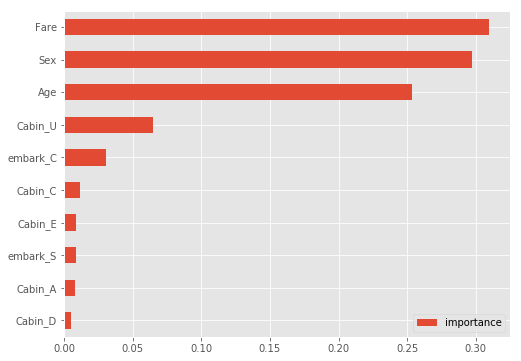

In [134]:
imp[-10:].plot.barh()

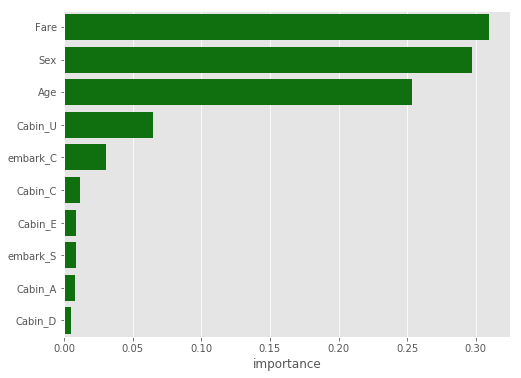

In [135]:
imp=imp.sort_values(by='importance',ascending=False)
sns.barplot(imp.importance[:10],imp.index[:10], color='g')

In [136]:
imp.index

Index(['Fare', 'Sex', 'Age', 'Cabin_U', 'embark_C', 'Cabin_C', 'Cabin_E',
       'embark_S', 'Cabin_A', 'Cabin_D', 'embark_Q', 'Cabin_B', 'Cabin_F',
       'Cabin_G', 'Cabin_T'],
      dtype='object')

In [137]:
model=RandomForestClassifier(n_estimators=200)
model.fit(train_X,train_y)
model.score(train_X, train_y)

0.9903691813804173

In [138]:
model.score(valid_X, valid_y)

0.77238805970149249

In [140]:
pred_y=model.predict(valid_X)

In [141]:
from sklearn.metrics import accuracy_score

In [143]:
accuracy_score(valid_y, pred_y)

0.77238805970149249